In [3]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.strategies.ddp import DDPStrategy
from pytorch_lightning import Trainer
import importlib
import argparse
from pytorch_lightning.loggers import TensorBoardLogger
from utils.data import DATA_Module
from model.FR import FR
import time
from utils.logger import print_log
from shutil import copyfile
import os
from utils.data import DATA_Module

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

now = time.localtime()

# --------------------------------------------
# Configurations
# --------------------------------------------   
print(sys.path)
config = importlib.import_module("configs.res200-arc-sgd")
global conf
conf = config.conf

## Save directories
SAVE_DIR = Path.cwd().parent / 'save' / f'train_{now.tm_mon}-{now.tm_mday}_{now.tm_hour}h{now.tm_min}m-{now.tm_sec}s'
SAVE_DIR = SAVE_DIR.parent / ('_'.join(
                                    [SAVE_DIR.name, conf.network, conf.loss, 
                                    f'lr_{str(5e-2)}']
                                    ))
SAVE_DIR.mkdir(parents=True, exist_ok=True)
LOGGER = str(SAVE_DIR / 'log.txt')

## Print configurations
msg_conf = '\n' + '='*50 + '\n'
msg_conf += '* Configuration *\n\n'
for k in conf: msg_conf += f"{k} = {conf[k]}" + "\n"
msg_conf += '='*50
print_log(LOGGER, msg_conf)
del msg_conf

# --------------------------------------------
# Dataset
# --------------------------------------------
dm = DATA_Module(conf, LOGGER)
dm.setup()
# --------------------------------------------
# Model
# --------------------------------------------
model = FR(conf, LOGGER)

# --------------------------------------------
# Callbacks
# --------------------------------------------

for idx, data in enumerate(dm.train_dataloader()[0]):
    if idx==0:
        img, label = data
        break

img_1 = img

# --------------------------------------------
# Callbacks
# --------------------------------------------

# # checkpoint
# checkpoint_callback = [
#     ModelCheckpoint(dirpath=str(SAVE_DIR), monitor='epoch', mode='max', filename='{epoch}'),
#     # ModelCheckpoint(dirpath=str(SAVE_DIR), filename='{epoch}-{val Threshold:.4f}-{val APCER:.4f}-{val ACER:.4f}-{val acc:.4f}',
#     #                 save_top_k=5, monitor="val ACER", mode="min")
#     ]

# # tensorboard
# tensorboard_logger = TensorBoardLogger(str(Path.cwd().parent), name="TBLog", version=SAVE_DIR.name)


# # --------------------------------------------
# # Training
# # --------------------------------------------

# if args.mode == 'train':
#     trainer = Trainer(gpus=1, max_epochs=conf.num_epoch, enable_progress_bar=False,
#                     callbacks=[*checkpoint_callback], logger=tensorboard_logger, log_every_n_steps=1)
#     trainer.fit(model)

# # --------------------------------------------
# # Test
# # --------------------------------------------

# elif args.mode == 'test':
#     trainer = Trainer(logger=tensorboard_logger)
#     trainer.test(model, ckpt_path=conf.pretrained_model)
    


['/workspace/cosmos-eskim-facerecognition-shlee', '/opt/conda/lib/python38.zip', '/opt/conda/lib/python3.8', '/opt/conda/lib/python3.8/lib-dynload', '', '/opt/conda/lib/python3.8/site-packages', '/opt/conda/lib/python3.8/site-packages/IPython/extensions', '/root/.ipython', '/workspace', '/workspace', '/tmp/tmpjpay9812', '/workspace']

* Configuration *

network = ResNet34
pretrained = False
transfer_learning = False
pretrained_dir = ./models/
pretrained_model = ['FR37.pth']
use_checkpoint = False
checkpoint_path = ./model_backup/LResNet200E-IR+ArcFace_MP_MMAAG_Baseline_MP_2021-07-23_09_34_37_epochs_2_metric.pth
security_level = 3
max_level = 6
min_level = 1
loss = ArcFace
optimizer = SGD
train_dataset = ['lfw']
n_classes = [5749]
db_pose = ['all']
val_dataset = ['lfw', 'agedb_30']
val_byte = True
train_dataset_dir = ['/workspace/dataset/FR/train/lfw']
val_dataset_dir = ['/workspace/dataset/FR/validation/lfw', '/workspace/dataset/FR/validation/agedb_30']
test_dataset_dir = /workspace/da

tensor([[[0.5255, 0.5255, 0.5255,  ..., 0.1686, 0.2157, 0.2980],
         [0.5255, 0.5255, 0.5255,  ..., 0.1686, 0.2078, 0.2980],
         [0.5176, 0.5216, 0.5216,  ..., 0.1647, 0.2039, 0.2824],
         ...,
         [0.1255, 0.1294, 0.1294,  ..., 0.2902, 0.3137, 0.3255],
         [0.1255, 0.1294, 0.1294,  ..., 0.2667, 0.2902, 0.3020],
         [0.1255, 0.1294, 0.1333,  ..., 0.2471, 0.2706, 0.2824]],

        [[0.5333, 0.5333, 0.5333,  ..., 0.1333, 0.1725, 0.2510],
         [0.5333, 0.5333, 0.5333,  ..., 0.1294, 0.1686, 0.2471],
         [0.5333, 0.5294, 0.5333,  ..., 0.1294, 0.1608, 0.2353],
         ...,
         [0.1255, 0.1294, 0.1294,  ..., 0.2902, 0.3137, 0.3255],
         [0.1255, 0.1294, 0.1294,  ..., 0.2667, 0.2902, 0.3020],
         [0.1255, 0.1294, 0.1333,  ..., 0.2471, 0.2706, 0.2824]],

        [[0.5294, 0.5294, 0.5294,  ..., 0.0980, 0.1373, 0.2196],
         [0.5333, 0.5294, 0.5294,  ..., 0.0980, 0.1333, 0.2157],
         [0.5294, 0.5294, 0.5255,  ..., 0.0980, 0.1294, 0.

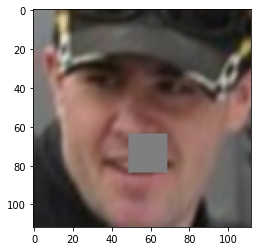

: 

In [4]:

import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
import torch
import albumentations as alb
import numpy as np

# gamma = alb.Compose([alb.ISONoise(p=1, color_shift=(0, 0.05), intensity=(0, 0.3))])
gamma = alb.Compose([alb.CoarseDropout(p=1, min_holes=1, max_holes=10, max_height=3, max_width=3)])
# gamma = alb.Compose([alb.MotionBlur(p=1)])
img1 = 0.5*img_1[0]+0.5
# img2 = (255*img1).numpy().astype(np.uint8)
# img_2 = gamma(image=img2.transpose(1, 2, 0))["image"]
# print(img2.shape)
print(img1)
img_show = ToPILImage()(img1)
plt.imshow(img_show)

In [6]:
from pathlib import Path
import matplotlib.pyplot as plt

pth = Path('/workspace/dataset/FR/train/ms1m_arcface_122/imgs/61719')

print(len(list(pth.iterdir())))

87


(112, 112, 3)


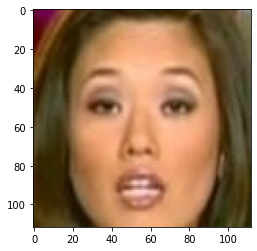

In [11]:
import cv2

img_pth = '/workspace/dataset/FR/train/ms1m_arcface_122/imgs/61719/4246568.jpg'
img = cv2.imread(img_pth)
plt.imshow(img[:, :, [2, 1, 0]])
print(img.shape)